# Libraries

In [1]:
import pandas as pd
import cPickle as pickle
%pylab inline
import seaborn as sns
import sys
import statsmodels.formula.api as smf
from sklearn import preprocessing


sys.path.append('./hoopla')


from hoopla import hoopla as hp

Populating the interactive namespace from numpy and matplotlib


In [141]:
reload(hp) # as needed

<module 'hoopla.hoopla' from 'hoopla/hoopla.py'>

In [2]:
df = pd.read_pickle("data/fullstats_lac_dal_20132016_110515_v1.p")

# Variable Settings

In [3]:
# Collect all columns as unicode vars
all_vars = []
for x in df.columns.tolist():
    all_vars.append(x.encode())

vars_of_interest = all_vars

target = "PLUS_MINUS"


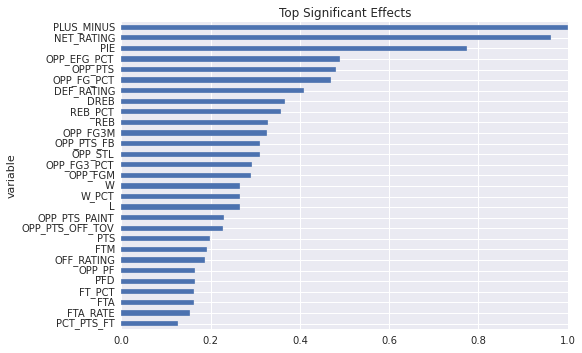

In [5]:
#key_vars = ["DREB","REB","REB_PCT","EFG_PCT","FG_PCT","PTS_OFF_TOV"]
model_frame = hp.make_model_frame(df,all_vars,"PLUS_MINUS")

# Z-Score Normalization

In [98]:
df1_std = hp.make_zscore_frame(df1)

In [99]:
df1_std

,REB_PCT,EFG_PCT,PTS_OFF_TOV
PeriodID,,,
10-31-2013_1,0.624312,0.311811,1.318727
10-31-2013_2,1.522619,0.614829,-0.808967
10-31-2013_3,-0.142992,-0.193219,1.673342
10-31-2013_4,0.923747,0.528252,1.673342
12-25-2013_1,0.455879,0.744693,-0.808967
12-25-2013_2,-1.602741,-0.012851,-0.099736
12-25-2013_3,-0.142992,0.167517,1.673342
12-25-2013_4,-0.835437,-0.359157,-1.518198
1-30-2014_1,-0.751221,-0.337513,-0.808967


# Multiple Regression with Select Variables

In [143]:
# Unstandardized
key_vars = ["DREB","REB","REB_PCT","EFG_PCT","FG_PCT","PTS_OFF_TOV"]


formstring = hp.make_formstring(key_vars,target)

# Create model
lm = smf.ols(formula=formstring,data=df).fit()
print "rsquared: %s" % lm.rsquared

PLUS_MINUS ~ DREB + REB + REB_PCT + EFG_PCT + FG_PCT + PTS_OFF_TOV
rsquared: 0.772127681126


In [154]:
# Standardized
df1 = df[key_vars]
df1_std = hp.make_zscore_frame(df1)
df1_std[target] = df[target]


key_vars = ["DREB","REB","REB_PCT","EFG_PCT","FG_PCT","PTS_OFF_TOV"]


formstring = hp.make_formstring(key_vars,target)

# Create model
lm_std = smf.ols(formula=formstring,data=df1_std).fit()
print "rsquared: %s" % lm_std.rsquared


PLUS_MINUS ~ DREB + REB + REB_PCT + EFG_PCT + FG_PCT + PTS_OFF_TOV
rsquared: 0.772127681126


In [155]:
lm_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     14.12
Date:                Thu, 05 Nov 2015   Prob (F-statistic):           5.70e-07
Time:                        18:33:37   Log-Likelihood:                -86.409
No. Observations:                  32   AIC:                             186.8
Df Residuals:                      25   BIC:                             197.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3750      0.720     -0.521      0.607        -1.858     1.108
DREB            0.6522      1.588      0.411      0.685        -2.618     3.922
REB             5.9264      2.456      2.413      0.023         0.868    10.985
REB_PCT        -2.4200      1.649     -1.468      0.155        -5.815     0.975
EFG_PCT         8.9478      3.982      2.247      0.034         0.747    17.148
FG_PCT         -4.9299      3.940     -1.251      0.222       -13.045     3.185
PTS_OFF_TOV     2.6540      0.823      3.223      0.004         0.958     4.350
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.315
Skew:                          -0.078   Prob(JB):                        0.854
Kurtosis:                       2.540   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

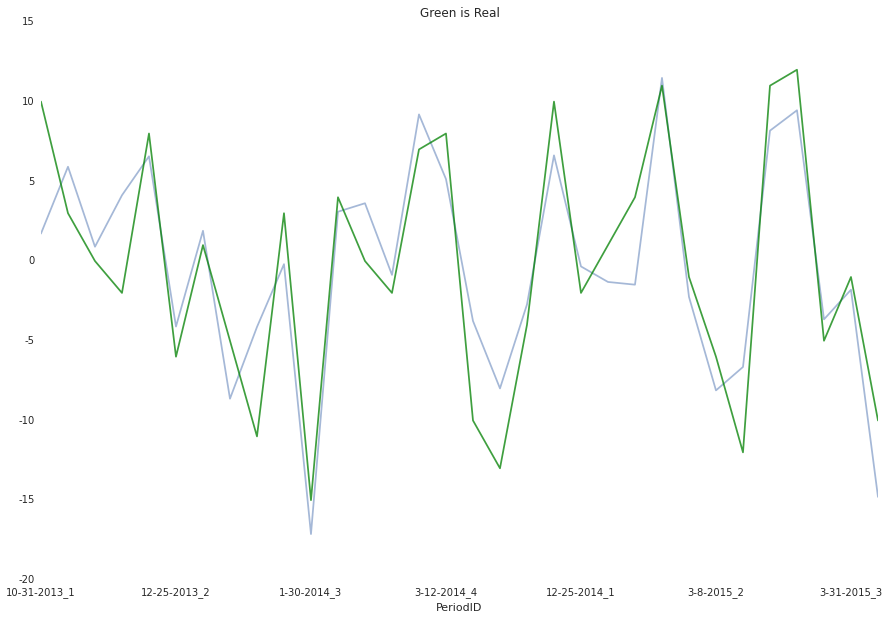

In [228]:
# Compare values to actual
plt.figure(figsize=(15,10))
lm_std.fittedvalues.plot(alpha=.50)
df[target].plot(color='green',alpha=.75)
plt.title("Green is Real")


In [167]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [173]:
from mpl_toolkits.mplot3d import Axes3D

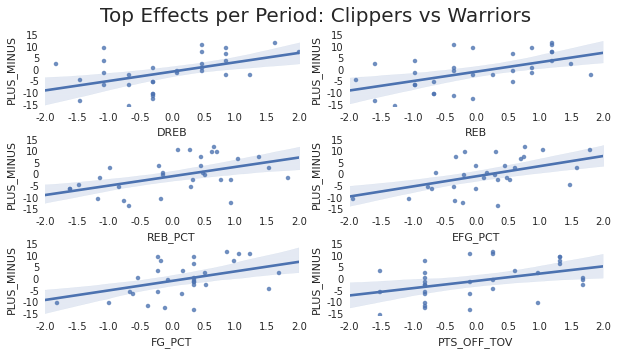

In [171]:
i = 1
plt.figure(figsize=(10,5))
plt.suptitle('Top Effects per Period: Clippers vs Warriors',fontsize=20)
for v in key_vars:
    plt.subplot(3,2,i)
    sns.regplot(x=v,y=target,data=df1_std,label=v,xlabel="")
    plt.ylim(-15,15)
    plt.xlim(-2,2)
    i += 1


In [148]:
lm_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     14.12
Date:                Thu, 05 Nov 2015   Prob (F-statistic):           5.70e-07
Time:                        18:31:20   Log-Likelihood:                -86.409
No. Observations:                  32   AIC:                             186.8
Df Residuals:                      25   BIC:                             197.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -28.2034      4.058     -6.950      0.000       -36.561   -19.845
DREB            0.2502      0.609      0.411      0.685        -1.004     1.504
REB             1.8338      0.760      2.413      0.023         0.269     3.399
REB_PCT       -22.6450     15.427     -1.468      0.155       -54.417     9.127
EFG_PCT        64.5561     28.727      2.247      0.034         5.391   123.721
FG_PCT        -39.5659     31.623     -1.251      0.222      -104.696    25.564
PTS_OFF_TOV     0.9411      0.292      3.223      0.004         0.340     1.543
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.315
Skew:                          -0.078   Prob(JB):                        0.854
Kurtosis:                       2.540   Cond. No.                         830.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Functions

### Temp

In [38]:
df1.head()

,REB_PCT,EFG_PCT,PTS_OFF_TOV
PeriodID,,,
10-31-2013_1,0.556,0.545,8
10-31-2013_2,0.652,0.587,2
10-31-2013_3,0.474,0.475,9
10-31-2013_4,0.588,0.575,9
12-25-2013_1,0.538,0.605,2


In [39]:
v = key_vars[0]

In [53]:
test_series = df1[v]

In [59]:
test_series

PeriodID
10-31-2013_1    0.556
10-31-2013_2    0.652
10-31-2013_3    0.474
10-31-2013_4    0.588
12-25-2013_1    0.538
12-25-2013_2    0.318
12-25-2013_3    0.474
12-25-2013_4    0.400
1-30-2014_1     0.409
1-30-2014_2     0.385
1-30-2014_3     0.231
1-30-2014_4     0.538
3-12-2014_1     0.545
3-12-2014_2     0.524
3-12-2014_3     0.600
3-12-2014_4     0.636
11-5-2014_1     0.364
11-5-2014_2     0.417
11-5-2014_3     0.333
11-5-2014_4     0.565
12-25-2014_1    0.571
12-25-2014_2    0.542
12-25-2014_3    0.467
12-25-2014_4    0.519
3-8-2015_1      0.684
3-8-2015_2      0.318
3-8-2015_3      0.588
3-8-2015_4      0.500
3-31-2015_1     0.560
3-31-2015_2     0.522
3-31-2015_3     0.368
3-31-2015_4     0.471
Name: REB_PCT, dtype: float64

In [60]:
test_series.apply(x+1.0,x)

TypeError: coercing to Unicode: need string or buffer, float found

In [50]:
df1_norm = df1[v].mean(),df1[v].std()

0.48928125000000006

In [46]:
def norm(x,mean,std):
    """Return normalized
    
    >>> norm(x,
    """
    return((x - mean)/std )
    


In [37]:
# Normalizer
df1 = df[key_vars]